In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
sns.set()

In [138]:
df=pd.ExcelFile('/content/cust_data.xlsx').parse("in")

In [139]:
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [140]:
df.shape

(30000, 38)

In [141]:
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
JM_Smucker                   0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [142]:
df['Gender'] = df['Gender'].fillna('Others')

In [143]:
df.isnull().sum().sum()

0

Text(0.5, 1.0, 'Distribution of Order')

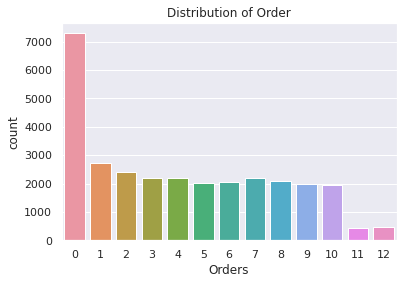

In [144]:
#distribution of Orders
sns.countplot(data=df,x='Orders')
plt.title('Distribution of Order')

Text(0.5, 1.0, 'Gender Distribution')

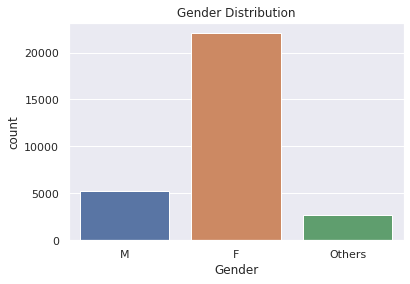

In [145]:
#Gender Distribution
sns.countplot(data=df,x='Gender')
plt.title('Gender Distribution')

In [146]:
#encoding Male and Female
df['Gender']=df['Gender'].map({'M':1,'F':2,'Others':3})

In [147]:
#dropping Cust_ID
df=df.drop('Cust_ID',axis=1)

In [148]:
x=df.columns
data=[]
for i in x:
  data.append({i:df[i].sum()})

In [149]:
df1={'Jordan': 8023,
 'Gatorade': 7570,
 'Samsung': 6688,
 'Asus': 4840,
 'Udis': 4306,
 'Mondelez International': 4193,
 'Wrangler': 3208,
 'Vans': 3343,
 'Fila': 2828,
 'Brooks': 4204,
 'H&M': 9846,
 'Dairy Queen': 6280,
 'Fendi': 4244,
 'Hewlett Packard': 4833,
 'Pladis': 3183,
 'Asics': 9007,
 'Siemens': 1442,
 'J.M. Smucker': 22644,
 'Pop Chips': 7437,
 'Juniper': 14125,
 'Huawei': 7740,
 'Compaq': 3563,
 'IBM': 959,
 'Burberry': 12841,
 'Mi': 3640,
 'LG': 3076,
 'Dior': 8134,
 'Scabal': 11102,
 'Tommy Hilfiger': 4769,
 'Hollister': 2330,
 'Forever 21': 1720,
 'Colavita': 5766,
 'Microsoft': 3491,
 'Jiffy mix': 2641,
 'Kraft': 2127}

In [150]:
brands=pd.DataFrame(df1.items(),columns=['Brands','Orders'])

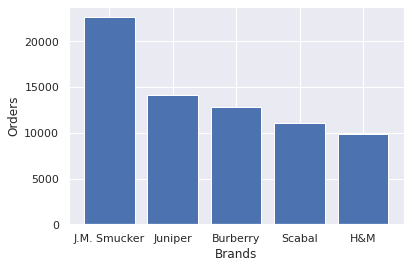

In [151]:
#Top 5 Orderd Brands
x=brands.sort_values(by=['Orders'],ascending=False)
top=x[:5]
plt.bar(top['Brands'],top['Orders'])
plt.xlabel('Brands')
plt.ylabel('Orders')
plt.show()

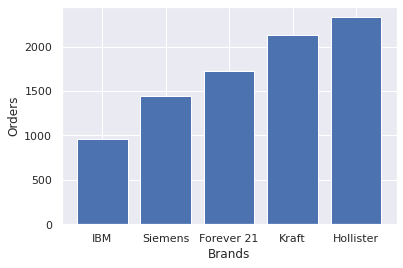

In [152]:
#Least 5 Orders
y=brands.sort_values(by=['Orders'])
low=y[:5]
plt.bar(low['Brands'],low['Orders'])
plt.xlabel('Brands')
plt.ylabel('Orders')
plt.show()

KMeans(Cluster Analysis)

In [153]:
from sklearn.cluster import KMeans

In [154]:
X=df

In [155]:
X['Gender'].isnull().sum()

0

In [156]:
K=range(1,11)
wcss=[]
for k in K:
  kmeans=KMeans(n_clusters=k,init='k-means++',random_state=0)
  kmeans=kmeans.fit(X)
  wcss_iter=kmeans.inertia_
  wcss.append(wcss_iter)

Elbow Method

Text(0.5, 1.0, 'Elbow Method')

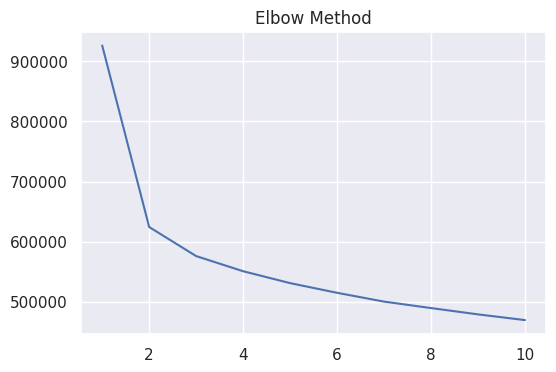

In [157]:
clusters=range(1,11)
plt.figure(dpi=100)
plt.plot(clusters,wcss)
plt.title('Elbow Method')

The Last abrupt has happend in the point 4 from then it seems to be normal,from this figure we have taken our K-value is 4

Siloutte Score with respect to clusters

In [158]:
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.cm as cm
import numpy as np

In [159]:
kmeans_model = KMeans(n_clusters=2, random_state=1).fit(X)
labels = kmeans_model.labels_
score=silhouette_score(X, labels, metric='euclidean')
print('Silhoutte score:',(round(score,2)))

Silhoutte score: 0.33


In [182]:
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
labels = kmeans_model.labels_
score1=silhouette_score(X, labels, metric='euclidean')
print('Silhoutte score:',(round(score1,4)))

Silhoutte score: 0.2463


In [183]:
kmeans_model = KMeans(n_clusters=4, random_state=1).fit(X)
labels = kmeans_model.labels_
score2=silhouette_score(X, labels, metric='euclidean')
print('Silhoutte score:',(round(score2,4)))

Silhoutte score: 0.2494


In [180]:
kmeans_model = KMeans(n_clusters=5, random_state=1).fit(X)
labels = kmeans_model.labels_
score3=silhouette_score(X, labels, metric='euclidean')
print('Silhoutte score:',(round(score3,2)))

Silhoutte score: 0.23


In [181]:
kmeans_model = KMeans(n_clusters=6, random_state=1).fit(X)
labels = kmeans_model.labels_
score4=silhouette_score(X, labels, metric='euclidean')
print('Silhoutte score:',(round(score4,2)))

Silhoutte score: 0.22


The silhouette analysis is used to choose an optimal value for n_clusters. The silhouette score shows that the n_clusters value of 3, 5 and 6 are less compared to the given data due to the silhouette scores. Silhouette score is more ambivalent in deciding between 2 and 4. In the Elbow method the abrupt change has also happend after 2, with this in consideration taking the second highest silhouette score after 2 is found to be 4. With this analysis we are taking n_Clusters=4

In [184]:
km = KMeans(n_clusters=4)
km.fit(X) 

KMeans(n_clusters=4)

In [185]:
data_output = df.copy(deep = True)

In [186]:
data_output['cluster']=km.labels_

In [187]:
data_output

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,cluster
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,10,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(2.85, 2000, '1187')

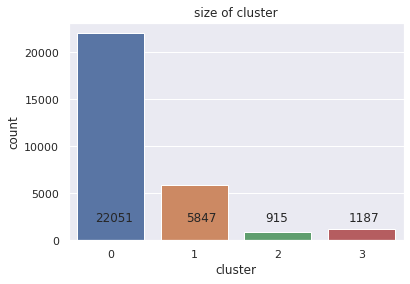

In [188]:
sns.countplot(data=data_output,x='cluster')
plt.title('size of cluster')
plt.text(x=-.18,y=2000,s=np.unique(km.labels_,return_counts=True)[1][0])
plt.text(x=.9,y=2000,s=np.unique(km.labels_,return_counts=True)[1][1])
plt.text(x=1.85,y=2000,s=np.unique(km.labels_,return_counts=True)[1][2])
plt.text(x=2.85,y=2000,s=np.unique(km.labels_,return_counts=True)[1][3])